<font size=5  color=#003366> <b>[LELEC2900] - Signal Processing <br><br> 
Python04 - Filter Design</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

<font size=5 color=#009999> <b> Reminder: Filter design theory</b> </font> <br> 

When designing digital filters, one often wishes to approximate ideal filters (such as the theoretical lowpass or bandpass filters). These theoretical prototypes feature ideal frequency responses:

- with discontinuous transitions
- with a purely flat magnitude in the different bands.

Obtaining these ideal frequency responses is impossible in practice with the FIR/IIR filters that we consider. For this reason, the filters designed in this course are characterized by the presence of 

- transition zones between the different bands
- ripples (oscillations) within the bands

An example illustrating the case of a lowpass filter is displayed below 

<img src="Example_LP.png" width = "400">

Depending on the considered application, several requirements have to be specified: passband critical frequencies, stopband critical frequencies, passband ripple, and stopband attenuation. These parameters must be provided as input when designing the filter. 

Two classes of filters are usually distinguished: FIR and IIR filters. 

<font size=3 color=#009999> <b>Finite impulse response filters</b> </font> <br> 

An FIR filter can be described by means of an array $b = [b_0, b_1, \ldots, b_{N-1}]$ containing the N elements of its impulse response. The transfer function of the filter is in that case given by 

$$ H_\text{FIR}(z) = \sum_{k=0}^{N-1} b_k z^{-k} $$

In order to generate the coefficients of an FIR filter, one must provide as input parameter the number $N$ of taps in the impulse response. 

In the framework of this session, FIR filters will be designed by means of three methods: 

- the window method
- the least square method
- Remez algorithm

<font size=3 color=#009999> <b>Infinite impulse response filters</b> </font> <br> 

We here focus on IIR filters whose transfer function can be expressed as a rational function 

$$
\begin{split}\begin{align}
    H_\text{IIR}(z) &= \frac{\sum_{k=0}^{M-1} b_k z^{-k}}{\sum_{k=0}^{N-1} a_k z^{-k}} \\
\end{align}\end{split}
$$

Unlike FIR filters, IIR filters are described by means of two arrays 

$ b = [b_0, b_1, ..., b_{M-1}]$, containing filter coefficients at the numerator<br>
$ a = [a_0, a_1, ..., a_{N-1}]$, containing filter coefficients at the denominator <br><br>

In order to generate the coefficients of an IIR filter, one must provide as input parameter the order of the filter.

FIR and IIR filters are defined by the number of taps they convolve over. Because IIR filters are recursive, they can perform as well as FIR filters with far fewer taps. This should mean that IIR filters are faster given the same filtering requirements. The downside is that they can be unstable (because of the feedback loop) and they alter the phase of the signal in a non-linear way (e.g. high frequencies and low-frequencies could be separated in time when they go through the filter).

<font size=5 color=#009999> <b>Part I - FIR filters<b>  </font> <br> 

<font size=5 color=#009999> <i>Exercise 1 - Order estimation and filter design</i>  </font> <br> 

When designing FIR filters, one of the first parameters to consider in order to meet the requirements is the filter order. In this exercise, we will use the function <samp> scipy.signal.kaiserord</samp> for this purpose.<br>

<div class="alert alert-info">
<b>HINT</b> <br>
The functions <samp>freqz</samp> can be used to make a comprehensive study of the different characteristics of a designed filter such as its frequency response, phase response, impulse and step reponse etc.

</div>

<ol>
    <li> Use the function <samp>scipy.signal.kaiserord</samp> to estimate the order of a linear-phase lowpass FIR filter with the following specifications: 
   <table>
            <thead>
                <tr>
                    <th> Parameter </th>
                    <th>Value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>sampling rate</td>
                    <td>10 kHz</td>
                </tr>
                <tr>
                    <td>passband edge frequency ($\omega_p$)</td>
                    <td>2 kHz</td>
                </tr>
                <tr>
                    <td>stopband edge frequency ($\omega_s$)</td>
                    <td>2.5 kHz</td>
                </tr>
                <tr>
                    <td>passband ripple (δp)</td>
                    <td>0.005</td>
                </tr>
                <tr>
                    <td>stopband ripple (δs)</td>
                    <td>0.005</td>
                </tr>
            </tbody>
    </table>        
    <li> Generate the filter coefficient using the function <samp>scipy.signal.firls</samp> and with <samp>scipy.signal.firwin <samp> for a kaiser window. Plot the frequency response, magnitude and phase reponse of the designed filter.
   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


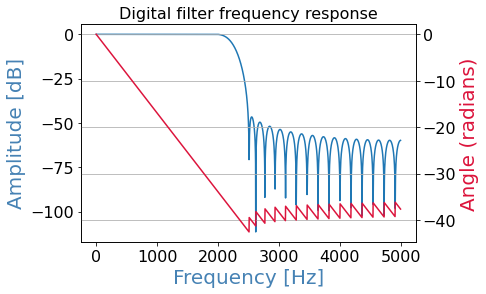

In [33]:
import numpy as np
from scipy import signal

%load_ext autoreload
%autoreload 2
from make_graphs import plot_response

fs = 10e3

width = 500     #of the transition region
ripple = 0.005
ripple_db = 20*np.log10(ripple)
cutoff = 2.25e3

numtaps, beta = signal.kaiserord(ripple_db, width/(0.5*fs))  #the width has to be normalized ;)

#0.5 : pour respecter Nyquist puique qu'on normalise par rapport à une fraction de Nyquist 
#numtaps = order of the filter

taps = signal.firwin(numtaps, cutoff, window=('kaiser', beta),scale=False, nyq=0.5*fs)

w, h = signal.freqz(taps, worN = 2000)
plot_response(fs, w, h)

<font size=5 color=#009999> <i>Exercise 2 - Comparison of windows</i> </font> <br> 

The default window function used in <samp>firwin</samp> is the Hamming window. Repeat the previous exercise using the Hanning and Rectangular window functions and comment on the results.

Hanning


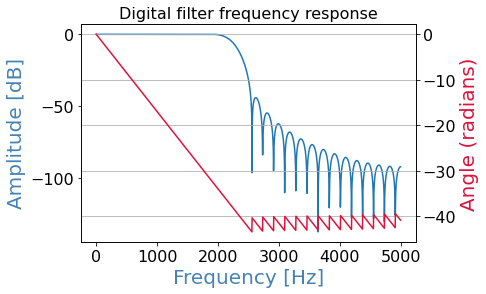

Rectangle


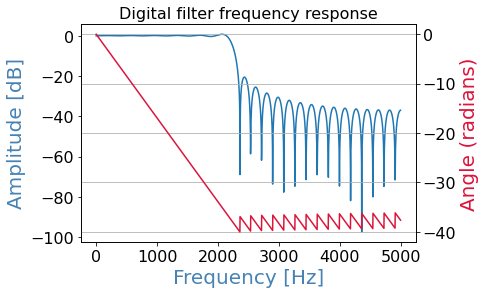

Hanning : sidelobe plus basse, stop band plus faible
Rect : zone de transition plus petite


In [37]:
taps = signal.firwin(numtaps, cutoff, window='hanning',scale=False, nyq=0.5*fs)

w, h = signal.freqz(taps, worN = 2000)

print('Hanning')
plot_response(fs, w, h)



taps = signal.firwin(numtaps, cutoff, window='rectangular',scale=False, nyq=0.5*fs)

print('Rectangle')
w, h = signal.freqz(taps, worN = 2000)
plot_response(fs, w, h)

print('Hanning : sidelobe plus basse, stop band plus faible')
print("Rect : zone de transition plus petite")

 <font size=5 color=#009999> <i>Exercise 3 - Lowpass, bandpass,.... filters using Remez algorithm</i> </font> <br> 
 
Design the following filters (of size 125) using <samp> signal.remez </samp>:
 
 <ol>
    <li> Low-pass Filter      
       <table>
            <thead>
                <tr>
                    <th> Parameter </th>
                    <th>Value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>sampling rate</td>
                    <td>22050 Hzv</td>
                </tr>
                <tr>
                    <td>cutoff frequency </td>
                    <td>2 kHz</td>
                </tr>
                <tr>
                    <td>Width of transition from pass band to stop band</td>
                    <td>250 Hz</td>
                </tr>
            </tbody>
       </table>    
        
   <li> High-pass Filter      
       <table>
            <thead>
                <tr>
                    <th> Parameter </th>
                    <th>Value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>sampling rate</td>
                    <td>22050 Hzv</td>
                </tr>
                <tr>
                    <td>cutoff frequency </td>
                    <td>2 kHz</td>
                </tr>
                <tr>
                    <td>Width of transition from pass band to stop band</td>
                    <td>250 Hz</td>
                </tr>
            </tbody>
       </table>        
    <li> Band-pass Filter      
       <table>
            <thead>
                <tr>
                    <th> Parameter </th>
                    <th>Value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>sampling rate</td>
                    <td>22050 Hz</td>
                </tr>
                <tr>
                    <td>Desired pass band </td>
                    <td>[2, 5] kHz</td>
                </tr>
                <tr>
                    <td>Width of transition from pass band to stop band</td>
                    <td>260 Hz</td>
                </tr>
            </tbody>
       </table>        
     <li> Band-stop Filter      
       <table>
            <thead>
                <tr>
                    <th> Parameter </th>
                    <th>Value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>sampling rate</td>
                    <td>22050 Hz</td>
                </tr>
                <tr>
                    <td>Desired stop band </td>
                    <td>[6, 8] kHz</td>
                </tr>
                <tr>
                    <td>Width of transition from pass band to stop band</td>
                    <td>200 Hz</td>
                </tr>
            </tbody>
       </table>      

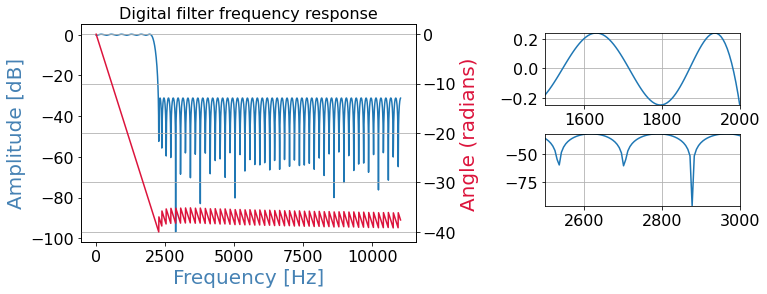

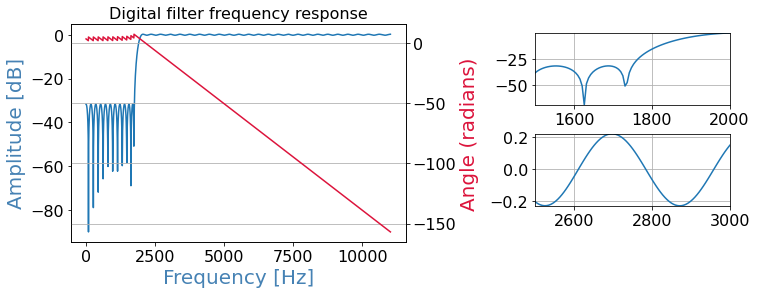

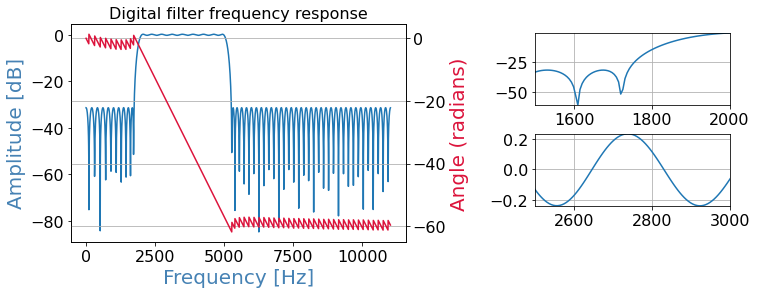

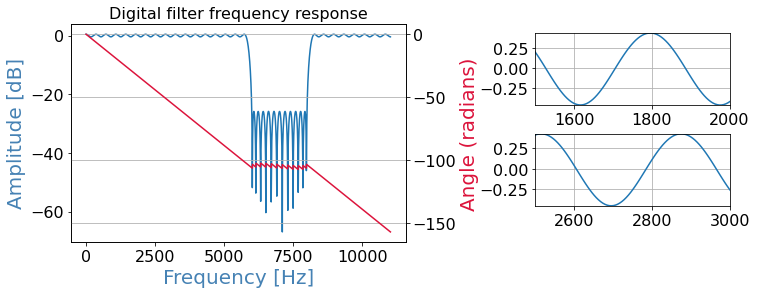

In [48]:
#band : [0, cutoff freq, nyquist fref]

#Low-pass Filter
fs = 22050
trans_width = 250
cutoff = 2e3
taps = signal.remez(125, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w, h = signal.freqz(taps, worN = 2000)
plot_response(fs, w, h, 'Low-pass filter')

#High-pass Filter
fs = 22050
trans_width = 250
cutoff = 2e3
taps =signal.remez(125, [0, cutoff - trans_width, cutoff, 0.5*fs], [0, 1], Hz=fs)
w, h = signal.freqz(taps, worN = 2000)
plot_response(fs, w, h, 'High-pass filter')

#Band-pass Filter
fs = 22050         # Sample rate, Hz
band = [2000, 5000]  # Desired pass band, Hz
trans_width = 260    # Width of transition from pass band to stop band, Hz
numtaps = 125       # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1],
         band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [0, 1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-pass Filter")

#Band-stop Filter
fs = 22050         # Sample rate, Hz
band = [6000, 8000]  # Desired stop band, Hz
trans_width = 200    # Width of transition from pass band to stop band, Hz
numtaps = 125        # Size of the FIR filter.
edges = [0, band[0] - trans_width, band[0], band[1], band[1] + trans_width, 0.5*fs]
taps = signal.remez(numtaps, edges, [1, 0, 1], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
plot_response(fs, w, h, "Band-stop Filter")

<font size=5 color=#009999> <b>Part II - IIR filters</b> </font> <br> <br>

<font size=5 color=#009999> <i>Exercise 4 - IIR filter design</i> </font> <br><br>
IIR filter design involves taking well known prototype analog lowpass filters and transforming them to discrete time lowpass, highpass, bandpass or bandstop filters. The most common transformation method is the bilinear transformation. The analog transfer function is usually of one of the following types: Butterworth, type I Chebyshev, type II Chebyshev or elliptic.
The difference between these filter types can be explained by considering the analog lowpass filter:

<table>
            <thead>
                <tr>
                    <th> IIR Filter </th>
                    <th> Passband </th>
                    <th> Transition Region </th>
                    <th> Stopband </th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td> Butterworth </td>
                    <td> maximally flat magnitude response </td>
                    <td> not as steep as Chebyshev </td>
                    <td> no ringing </td>
                </tr>
                <tr>
                    <td> type I Chebyshev </td>
                    <td> equiripple magnitude response </td>
                    <td> steeper than Butterworth and elliptic filters, but not as steep as type II Chebyshev</td>
                    <td> monotonically decreasing magnitude response in the passband with increasing frequency</td>
                </tr>
                <tr>
                    <td> type II Chebyshev </td>
                    <td> monotonically decreasing magnitude response </td>
                    <td> steeper than Butterworth, elliptic and type I Chebyshev</td>
                    <td> equiripple magnitude response</td>
                </tr>
                <tr>
                    <td> Elliptic </td>
                    <td> equiripple magnitude response </td>
                    <td> smoother than Butterworth, type I and type II Chebyshev</td>
                    <td> equiripple magnitude response</td>
                </tr>
            </tbody>
       </table>    
    
In this exercice, you are asked to design an IIR filter based on a Butterworth filter of order 4 and satisfying the following specifications:
<table>
    <thead>
        <tr>
            <th> Parameter </th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Sampling rate</td>
            <td>32 kHz</td>
        </tr>
        <tr>
            <td>Lowpass filter, with 3-dB bandwidth</td>
            <td>3.3 kHz</td>
        </tr>
    </tbody>
</table>    

In a first step, design "manually" this filter using the bilinear transform (see pdf statement). Then, use the function <samp>scipy.signal.iirfilter</samp> to design it "numerically". Compare the frequency response obtained with both methods. Are they similar? 

<i> Hint: the canonical expression of a Butterworth filter of order 4 can be rewritten as </i>
$$H(s) = \frac{a_0}{\left(s^2+2\cos(\frac{\pi}{8})s+1\right)\left(s^2+2\cos(\frac{3\pi}{8})s+1\right)}$$
<i> Without loss of generality, $a_0$ can be set to 1.</i> 


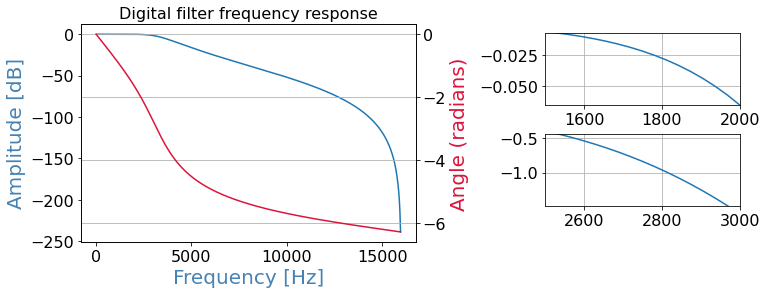

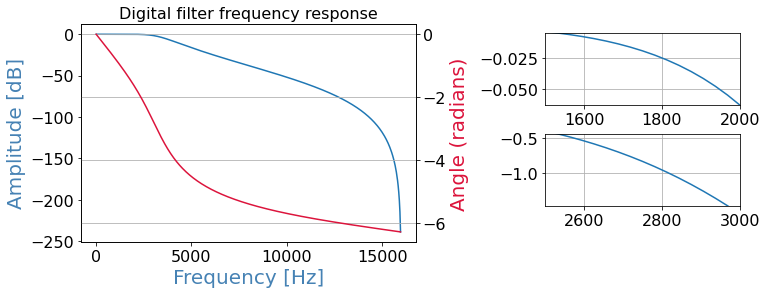

In [56]:
# Scipy design
fs = 32e3
cut_off = 3.3e3

#ATTENTION ICI DIGITAL DONC ON UTILISE FREQZ
b, a = signal.iirfilter(4, cut_off/(0.5*fs), btype='lowpass',analog = False, ftype= 'butter')
w, h = signal.freqz(b, a)
plot_response(fs, w, h, "Butterworth filter - Scipy design")


# Hand-computed (analytical) design
b = [1,4,6,4,1]
a = [186.746,  -433.165, 417.501, -188.25, 33.1683]
w, h = signal.freqz(b, a) 
plot_response(fs, w, h, "Butterworth filter - Analytical design")

<font size=5 color=#009999> <i>Exercise 5 - Summary</i> </font> <br><br>

Based on the observations you have made in this computer exercise:

<ol>
    <li> Which type is more appropriate for designing filters with arbitrary magnitude response? Why?
    <li> Which type is more appropriate in designing frequency selective filters (i.e. lowpass, bandpass, bandstop, highpass) with minimal order?
    <li> Which type enables design of lindear-phase filters? Is linear-phase guaranteed?
    <li> Which type is guaranteed to being stable? Why?
</ol>

In [ ]:
# iir : a besoin d'ordre moins éléves (ici butter iir n = 4 alors que fir : ordre = 55) 
# iir : peu stable a cause de boucle de retroaction 
# fir plus stable 